In [317]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [318]:
df=pd.ExcelFile("D:\Om Data Science\Data Science Assignments\Assignment 7\EastWestAirlines.xlsx",)

In [319]:
df

In [320]:
df=pd.read_excel("D:\Om Data Science\Data Science Assignments\Assignment 7\EastWestAirlines.xlsx")

In [321]:
df

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [322]:
data11=df.copy()

In [323]:
data11

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [324]:
df.shape

(26, 5)

In [325]:
df.describe()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,18,13,6,13,18
unique,18,3,3,3,18
top,"flying patterns, earning and use of frequent f...",NUMBER,1,Raw,Description
freq,1,9,3,9,1


In [326]:
df.isnull().sum()

East-West Airlines is trying to learn more about its customers.  Key issues are their     8
Unnamed: 1                                                                               13
Unnamed: 2                                                                               20
Unnamed: 3                                                                               13
Unnamed: 4                                                                                8
dtype: int64

In [327]:
df.columns

Index(['East-West Airlines is trying to learn more about its customers.  Key issues are their',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')

In [328]:
data=df.rename({'East-West Airlines is trying to learn more about its customers.  Key issues are their':'Review', 'Unnamed: 1':'1', 'Unnamed: 2':'2', 'Unnamed: 3':'3', 'Unnamed: 4':'4'}, axis=1)

In [329]:
data

,Review,1,2,3,4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [330]:
# Normalization function 

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [331]:
data.iloc[:,1:]

,1,2,3,4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,NUMBER,NaN,Telcom,Unique ID


In [332]:
data1=pd.get_dummies(data,columns=['1','2','3','4'])

In [333]:
data1

,Review,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,...,4_Number of flight miles in the past 12 months,4_Number of flight transactions in the past 12 months,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID
0,"flying patterns, earning and use of frequent f...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,card. The task is to identify customer segmen...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Source: Based upon real business data; company...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,(c) 2016 Galit Shmueli and Peter Bruce,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Field Name,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,ID#,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [334]:
# Removing NA values in data set
data1 = data1.dropna()

In [335]:
data1

,Review,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,...,4_Number of flight miles in the past 12 months,4_Number of flight transactions in the past 12 months,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID
0,"flying patterns, earning and use of frequent f...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,card. The task is to identify customer segmen...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Source: Based upon real business data; company...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,(c) 2016 Galit Shmueli and Peter Bruce,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Field Name,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,ID#,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10,Balance,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
11,Qual_miles,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
12,cc1_miles,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
13,cc2_miles,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [336]:
# Normalized data frame (considering the numerical part of data)

df_norm = norm_func(data1.iloc[:,1:])
df_norm

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of flight miles in the past 12 months,4_Number of flight transactions in the past 12 months,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [337]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 25
Data columns (total 28 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Review                                                                             18 non-null     object
 1   1_CHAR                                                                             18 non-null     uint8 
 2   1_Data Type                                                                        18 non-null     uint8 
 3   1_NUMBER                                                                           18 non-null     uint8 
 4   2_1                                                                                18 non-null     uint8 
 5   2_8                                                                                18 non-null     uint8 
 6   2_Ma

In [338]:
from scipy.cluster.hierarchy import linkage

In [339]:
# Normalized data frame (considering the numerical part of data)

df_norm = norm_func(df.iloc[:,1:])
df_norm

C:\Users\ompra\AppData\Local\Temp\ipykernel_19944\481200797.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x = (i-i.min())/(i.max()-i.min())


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [340]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
new_df = normalize.fit_transform(data1.iloc[:,1:].to_numpy())
df_norm1 = pd.DataFrame(new_df, columns = data1.columns[1:])
df_norm1

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of flight miles in the past 12 months,4_Number of flight transactions in the past 12 months,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [341]:
data1.columns[data1.nunique() == 1]

Index(['4_2 = 5,000 - 10,000', '4_3 = 10,001 - 25,000',
       '4_4 = 25,001 - 50,000', '4_5 = over 50,000'],
      dtype='object')

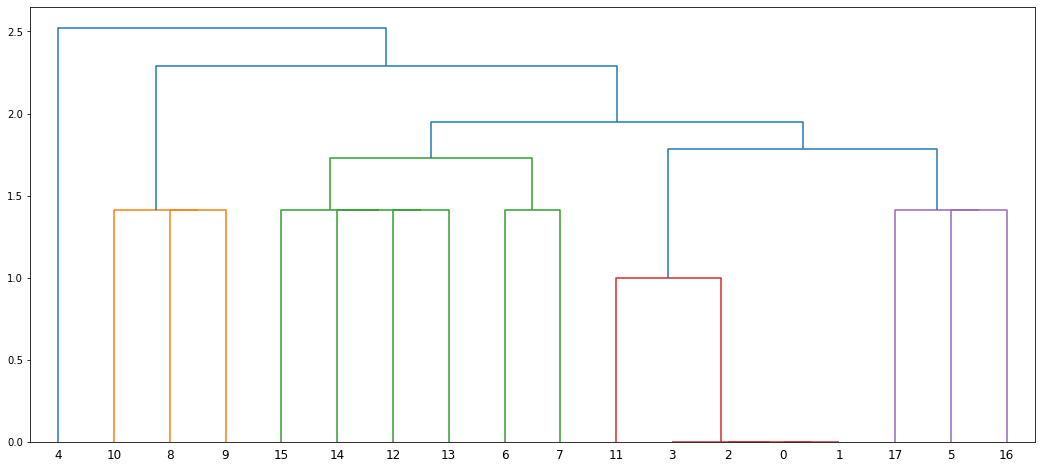

In [342]:
# create dendrogram

plt.figure(figsize = (18,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm1, method='average'))

In [343]:
A = linkage(df_norm1,method='complete',metric='euclidean')

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [85.0, 85.0, 95.0, 95.0],
  [53.75, 53.75, 90.0, 90.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [105.0, 105.0, 123.75, 123.75],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [114.375, 114.375, 162.5, 162.5],
  [71.875, 71.875, 138.4375, 138.4375],
  [22.5, 22.5, 105.15625, 105.15625],
  [5.0, 5.0, 63.828125, 63.828125]],
 'dcoord': [[0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [1.4142135623730951,
   1.7320508075688772,
   1.7320508075688772,

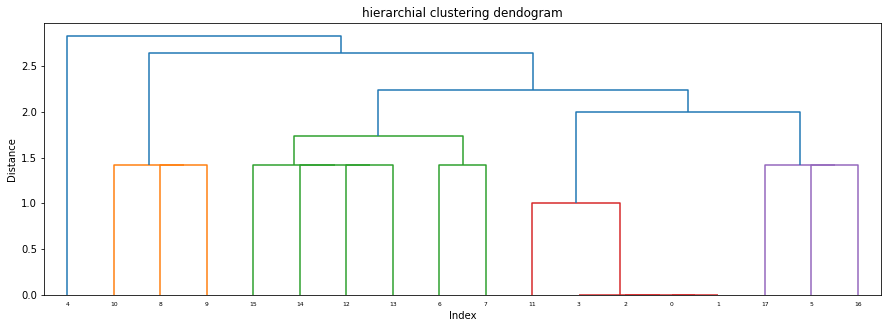

In [344]:
#OR create dendrogram
plt.figure(figsize=(15,5));plt.title("hierarchial clustering dendogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(A, leaf_rotation=0,leaf_font_size=6)

In [345]:
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster as skc

In [346]:
# create clusters
hc = AgglomerativeClustering(n_clusters=7 , affinity = 'euclidean', linkage = 'average')
hc

AgglomerativeClustering(linkage='average', n_clusters=7)

In [347]:
# save clusters for chart

y_hc = hc.fit_predict(df_norm1)

Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [348]:
Clusters

,Clusters
0,4
1,4
2,4
3,4
4,3
5,1
6,2
7,2
8,0
9,0


In [349]:
df_norm1['h_clusterid'] = Clusters

In [350]:
df_norm1.sort_values("h_clusterid")

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of flight transactions in the past 12 months,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID,h_clusterid
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
7,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [351]:
data['h_clusterid'] = Clusters

In [352]:
data

,Review,1,2,3,4,h_clusterid
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN,4.0
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,4.0
3,NaN,NaN,NaN,NaN,NaN,4.0
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN,3.0
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN,1.0
6,NaN,NaN,NaN,NaN,NaN,2.0
7,NaN,NaN,NaN,NaN,NaN,2.0
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description,0.0
9,ID#,NUMBER,NaN,Telcom,Unique ID,0.0


In [353]:
data.sort_values("h_clusterid")

,Review,1,2,3,4,h_clusterid
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description,0.0
9,ID#,NUMBER,NaN,Telcom,Unique ID,0.0
16,NaN,NaN,NaN,NaN,"2 = 5,000 - 10,000",1.0
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN,1.0
17,NaN,NaN,NaN,NaN,"3 = 10,001 - 25,000",1.0
6,NaN,NaN,NaN,NaN,NaN,2.0
7,NaN,NaN,NaN,NaN,NaN,2.0
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN,3.0
3,NaN,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,4.0


In [354]:
df2=df_norm1.copy()

In [355]:
df2

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of flight transactions in the past 12 months,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID,h_clusterid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
7,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [356]:
data

,Review,1,2,3,4,h_clusterid
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN,4.0
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,4.0
3,NaN,NaN,NaN,NaN,NaN,4.0
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN,3.0
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN,1.0
6,NaN,NaN,NaN,NaN,NaN,2.0
7,NaN,NaN,NaN,NaN,NaN,2.0
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description,0.0
9,ID#,NUMBER,NaN,Telcom,Unique ID,0.0


# K- Means Clusering

In [357]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [358]:
data11

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [359]:
dataset=data11.copy()

In [360]:
dataset

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [361]:
df_norm1

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of flight transactions in the past 12 months,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID,h_clusterid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
7,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [362]:
# Normalization function 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_dataset_df = scaler.fit_transform(df_norm1.iloc[:,1:])

In [363]:
scaled_dataset_df

array([[-0.24253563, -1.        , -0.4472136 , -0.35355339, -0.24253563,
        -1.        , -0.24253563, -0.4472136 , -0.24253563,  0.        ,
         0.        ,  0.        ,  0.        , -0.24253563, -0.24253563,
        -0.24253563, -0.24253563, -0.24253563, -0.24253563, -0.24253563,
        -0.24253563, -0.24253563, -0.24253563, -0.24253563, -0.24253563,
        -0.24253563,  0.47980812],
       [-0.24253563, -1.        , -0.4472136 , -0.35355339, -0.24253563,
        -1.        , -0.24253563, -0.4472136 , -0.24253563,  0.        ,
         0.        ,  0.        ,  0.        , -0.24253563, -0.24253563,
        -0.24253563, -0.24253563, -0.24253563, -0.24253563, -0.24253563,
        -0.24253563, -0.24253563, -0.24253563, -0.24253563, -0.24253563,
        -0.24253563,  0.47980812],
       [-0.24253563, -1.        , -0.4472136 , -0.35355339, -0.24253563,
        -1.        , -0.24253563, -0.4472136 , -0.24253563,  0.        ,
         0.        ,  0.        ,  0.        , -0.2425

In [364]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [365]:
#A good model is one with low inertia AND a low number of clusters ( K ).
#However, this is a tradeoff because as K increases, inertia decreases.

In [366]:
kmeans = KMeans(n_clusters=14, random_state=0)
kmeans.fit(scaled_dataset_df)

KMeans(n_clusters=14, random_state=0)

In [367]:
kmeans.inertia_

15.24705882352941

In [368]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [369]:
wcss = []
sil_score = []
cal_haz_score = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_dataset_df)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue #min 2 labels needed for silhoutte and cal_haz score (Refer documentation)
    sil_score.append(silhouette_score(scaled_dataset_df, kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(scaled_dataset_df, kmeans.labels_))

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [370]:
wcss

[413.99999999999983,
 338.5129732891886,
 296.3273014529553,
 273.63834109183244,
 205.41806554756198,
 210.6810234165609,
 180.10182741507327,
 160.9073596737583,
 122.18996567451919,
 109.2249870691682]

In [371]:
sil_score

[0.35244976715972987,
 0.1532698945021852,
 0.07774348997869135,
 0.17410970899990477,
 0.11542289041677442,
 0.13382746065117188,
 0.12168268767149243,
 0.15828498083195244,
 0.10835716759357214]

In [372]:
cal_haz_score

[3.567935419542027,
 2.9782785277479658,
 2.393747426954903,
 3.3000568142019935,
 2.316134295756875,
 2.380949280528012,
 2.247012911558819,
 2.6866877881824696,
 2.480303544770627]

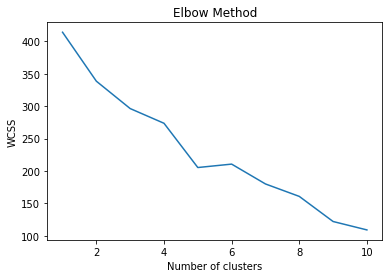

In [373]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [374]:
#Build Cluster algorithm

clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_dataset_df)

KMeans(n_clusters=5, random_state=42)

In [375]:
clusters_new.labels_

array([2, 2, 2, 2, 3, 4, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2])

In [376]:
#Assign clusters to the data set
df_norm1['clusterid_new'] = clusters_new.labels_

In [377]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.24253563,  1.        , -0.4472136 ,  2.82842712, -0.24253563,
         1.        , -0.24253563, -0.4472136 , -0.24253563,  0.        ,
         0.        ,  0.        ,  0.        , -0.24253563, -0.24253563,
        -0.24253563, -0.24253563, -0.24253563,  1.940285  , -0.24253563,
        -0.24253563, -0.24253563, -0.24253563,  1.940285  , -0.24253563,
        -0.24253563, -0.59976014],
       [-0.24253563,  1.        , -0.4472136 , -0.35355339, -0.24253563,
         1.        , -0.24253563, -0.4472136 , -0.24253563,  0.        ,
         0.        ,  0.        ,  0.        , -0.24253563, -0.24253563,
        -0.24253563,  4.12310563, -0.24253563, -0.24253563, -0.24253563,
        -0.24253563, -0.24253563, -0.24253563, -0.24253563, -0.24253563,
        -0.24253563,  1.01959224],
       [-0.24253563, -0.23076923,  0.17200523, -0.35355339, -0.24253563,
        -0.07692308, -0.24253563, -0.03440105,  0.09328293,  0.        ,
         0.        ,  0.        ,  0.        , -0.2425

In [378]:
df_norm1.sort_values('clusterid_new')

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID,h_clusterid,clusterid_new
6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0
7,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
14,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
15,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2
13,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,2
12,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
10,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6,2
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2


In [379]:
df_norm1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,...,4_Number of flight transactions in the past 12 months,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.000000,0.0,1.000000,0.000000,1.0,0.0,1.000000,0.0,0.000000,...,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.0,2.000000
1,1,0.000000,0.0,1.000000,0.000000,0.0,0.0,1.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,5.000000
2,2,0.230769,0.0,0.384615,0.230769,0.0,0.0,0.461538,0.0,0.153846,...,0.076923,0.0,0.076923,0.076923,0.076923,0.076923,0.0,0.076923,0.0,3.307692
3,3,0.000000,1.0,0.000000,0.000000,0.0,1.0,0.000000,1.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3.000000
4,4,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,1.000000


In [380]:
df_norm1.groupby('clusterid_new').mean()

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of flight transactions in the past 12 months,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID,h_clusterid
clusterid_new,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.0,1.000000,0.000000,1.0,0.0,1.000000,0.0,0.000000,0.000000,...,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.0,2.000000
1,0.000000,0.0,1.000000,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,5.000000
2,0.230769,0.0,0.384615,0.230769,0.0,0.0,0.461538,0.0,0.153846,0.076923,...,0.076923,0.0,0.076923,0.076923,0.076923,0.076923,0.0,0.076923,0.0,3.307692
3,0.000000,1.0,0.000000,0.000000,0.0,1.0,0.000000,1.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3.000000
4,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,1.000000


In [381]:
df_norm1

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID,h_clusterid,clusterid_new
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4
6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0
7,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2
9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2


In [382]:
df_norm1[df_norm1['clusterid_new']==2]

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID,h_clusterid,clusterid_new
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2
9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2
10,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6,2
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
12,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2
13,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,2


In [383]:
df_norm1['clusterid_new'].value_counts()

2    13
0     2
3     1
4     1
1     1
Name: clusterid_new, dtype: int64

# DBSCAN Method

In [384]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import numpy as np

In [385]:
df_norm1

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID,h_clusterid,clusterid_new
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4
6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0
7,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2
9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2


In [386]:
dbsdata=df_norm1.copy()

In [387]:
dbsdata

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID,h_clusterid,clusterid_new
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4
6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0
7,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2
9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2


In [388]:
dbsdata.drop(['h_clusterid','clusterid_new'], axis=1,inplace=True)

In [389]:
dbsdata

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of flight miles in the past 12 months,4_Number of flight transactions in the past 12 months,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [390]:
array=dbsdata.values

In [391]:
array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],


In [392]:
stscaler = StandardScaler().fit(array)
DBS = stscaler.transform(array)

In [393]:
DBS

array([[-0.4472136 , -0.24253563, -1.        , -0.4472136 , -0.35355339,
        -0.24253563, -1.        , -0.24253563, -0.4472136 , -0.24253563,
         0.        ,  0.        ,  0.        ,  0.        , -0.24253563,
        -0.24253563, -0.24253563, -0.24253563, -0.24253563, -0.24253563,
        -0.24253563, -0.24253563, -0.24253563, -0.24253563, -0.24253563,
        -0.24253563, -0.24253563],
       [-0.4472136 , -0.24253563, -1.        , -0.4472136 , -0.35355339,
        -0.24253563, -1.        , -0.24253563, -0.4472136 , -0.24253563,
         0.        ,  0.        ,  0.        ,  0.        , -0.24253563,
        -0.24253563, -0.24253563, -0.24253563, -0.24253563, -0.24253563,
        -0.24253563, -0.24253563, -0.24253563, -0.24253563, -0.24253563,
        -0.24253563, -0.24253563],
       [-0.4472136 , -0.24253563, -1.        , -0.4472136 , -0.35355339,
        -0.24253563, -1.        , -0.24253563, -0.4472136 , -0.24253563,
         0.        ,  0.        ,  0.        ,  0.    

In [394]:
dbscan = DBSCAN(eps=0.8, min_samples=4) #The larger the data set, the larger the value of MinPts/min_samples should be.
dbscan.fit(DBS)   #If your data has more than 2 dimensions, choose MinPts = 2*dim.

DBSCAN(eps=0.8, min_samples=4)

In [395]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1], dtype=int64)

In [396]:
cluster=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [397]:
cluster

,cluster
0,0
1,0
2,0
3,0
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [398]:
pd.concat([dbsdata,cluster], axis=1)

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of flight transactions in the past 12 months,4_Number of miles counted as qualifying for Topflight status,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1
6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
7,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1
9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1


In [399]:
pd.concat([df_norm1,cluster], axis=1)

,1_CHAR,1_Data Type,1_NUMBER,2_1,2_8,2_Max Data Length,3_Raw,3_Raw Data or Telcom Created Field?,3_Telcom,"4_1 = under 5,000",...,4_Number of miles earned from non-flight bonus transactions in the past 12 months,4_Number of miles earned with Rewards credit card in the past 12 months:,4_Number of miles earned with Small Business credit card in the past 12 months:,4_Number of miles earned with freq. flyer credit card in the past 12 months:,4_Number of miles eligible for award travel,4_Number of non-flight bonus transactions in the past 12 months,4_Unique ID,h_clusterid,clusterid_new,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,-1
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4,-1
6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0,-1
7,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,-1
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2,-1
9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,-1
